In [1]:
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import os 
import pandas as pd
import seaborn as sns

/home/jmatsen/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import datetime

Option to save plots upon regeneration (makes a new file since date string is appended.):

In [3]:
mpl.rcParams.update({
    'font.size': 16, 'axes.titlesize': 17, 'axes.labelsize': 15,
    'xtick.labelsize': 10, 'ytick.labelsize': 13,
    #'font.family': 'Lato', 
    'font.weight': 600,
    'axes.labelweight': 600, 'axes.titleweight': 600
    #'figure.autolayout': True
    })

In [4]:
regen_plots = False

In [5]:
if regen_plots:
    date_string = datetime.date.today().strftime("%y%m%d")
    plotpath = "./plots/" + date_string + "_read_alignments_to_bins"+ "/"
    print(plotpath)
    if not os.path.exists(plotpath):
        os.makedirs(plotpath)

In [6]:
# Note: we are going to change the names of these files.  
# I had originally used summary.dat but learned these are RPKM values even though
# they are integers. 
read_counts_path = \
    "/gscratch/lidstrom/meta4_bins/analysis/assemble_summaries/summary_counts.xls"
gene_data = pd.read_csv(read_counts_path, sep = '\t')

In [7]:
gene_data.head(2)

,genome,locus_tag,product,LakWasM100_LOW12_2_reads_mapped,LakWasMe97_LOW12_2_reads_mapped,LakWasMe98_LOW12_2_reads_mapped,LakWasMe99_LOW12_2_reads_mapped,LakWasM104_HOW12_2_reads_mapped,LakWasM105_HOW12_2_reads_mapped,LakWasM106_HOW12_2_reads_mapped,...,LakWasMet56_HOW8_2_reads_mapped,LakWasMet57_HOW8_2_reads_mapped,LakWasMet58_HOW8_2_reads_mapped,LakWasMet61_LOW9_2_reads_mapped,LakWasMet62_LOW9_2_reads_mapped,LakWasMet63_LOW9_2_reads_mapped,LakWasMet64_LOW9_2_reads_mapped,LakWasMet67_HOW9_2_reads_mapped,LakWasMet69_HOW9_2_reads_mapped,LakWasMet70_HOW9_2_reads_mapped
0,Methylobacter-123 (UID203),Ga0081607_10011,"DNA gyrase B subunit, carboxyl terminus",0,0,0,19,3,0,3,...,0,0,25,46,17,0,8,0,0,14
1,Methylobacter-123 (UID203),Ga0081607_10012,Putative addiction module component,0,0,0,15,4,0,0,...,0,0,24,18,6,0,14,0,0,17


In [8]:
gene_data.set_index(['genome', 'locus_tag', 'product'], inplace=True)

In [9]:
gene_data.head()

LakWasM100_LOW12_2_reads_mapped  \
genome                      locus_tag       product                                                                    
Methylobacter-123 (UID203)  Ga0081607_10011 DNA gyrase B subunit, carboxyl terminus                                0   
                            Ga0081607_10012 Putative addiction module component                                    0   
                            Ga0081607_10013 hypothetical protein                                                   0   
                            Ga0081607_10014 hypothetical protein                                                   8   
                            Ga0081607_10015 Protein of unknown function (DUF2281)                                  0   

                                                                                     LakWasMe97_LOW12_2_reads_mapped  \
genome                      locus_tag       product                                                                    
Methylobacter-123 (UID203)  Ga0081607_10011 DNA gyrase B subunit, carboxyl terminus                                0   
                            Ga0081607_10012 Putative addiction module component                                    0   
                            Ga0081607_10013 hypothetical protein                                                   0   
                            Ga0081607_10014 hypothetical protein                                                   0   
                            Ga0081607_10015 Protein of unknown function (DUF2281)                                  0   

                                                                                     LakWasMe98_LOW12_2_reads_mapped  \
genome                      locus_tag       product                                                                    
Methylobacter-123 (UID203)  Ga0081607_10011 DNA gyrase B subunit, carboxyl terminus                                0   
                            Ga0081607_10012 Putative addiction module component                                    0   
                            Ga0081607_10013 hypothetical protein                                                   0   
                            Ga0081607_10014 hypothetical protein                                                   0   
                            Ga0081607_10015 Protein of unknown function (DUF2281)                                  0   

                                                                                     LakWasMe99_LOW12_2_reads_mapped  \
genome                      locus_tag       product                                                                    
Methylobacter-123 (UID203)  Ga0081607_10011 DNA gyrase B subunit, carboxyl terminus                               19   
                            Ga0081607_10012 Putative addiction module component                                   15   
                            Ga0081607_10013 hypothetical protein                                                   4   
                            Ga0081607_10014 hypothetical protein                                                 114   
                            Ga0081607_10015 Protein of unknown function (DUF2281)                                  8   

                                                                                     LakWasM104_HOW12_2_reads_mapped  \
genome                      locus_tag       product                                                                    
Methylobacter-123 (UID203)  Ga0081607_10011 DNA gyrase B subunit, carboxyl terminus                                3   
                            Ga0081607_10012 Putative addiction module component                                    4   
                            Ga0081607_10013 hypothetical protein                                                   1   
                            Ga0081607_10014 hypothetical protein                                                  18   
 

In [10]:
sample_sums = pd.DataFrame({'read counts':gene_data.sum(index=0)})

In [11]:
sample_sums['reads/10^6'] = sample_sums['read counts']/(10**6)

In [12]:
sample_sums.head()

,read counts,reads/10^6
LakWasM100_LOW12_2_reads_mapped,19281599,19.281599
LakWasMe97_LOW12_2_reads_mapped,10748584,10.748584
LakWasMe98_LOW12_2_reads_mapped,12170694,12.170694
LakWasMe99_LOW12_2_reads_mapped,20904385,20.904385
LakWasM104_HOW12_2_reads_mapped,21358506,21.358506


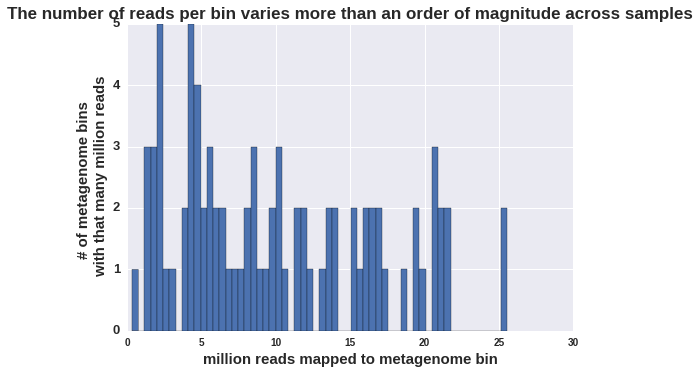

In [13]:
ax = sample_sums['reads/10^6'].plot.hist(bins = 60) #range=[6.5, 12.5])
fig = ax.get_figure()
ax.set_xlabel("million reads mapped to metagenome bin")
ax.set_ylabel("# of metagenome bins \n with that many million reads")
ax.set_title("The number of reads per bin varies more than an order of magnitude across samples")
if regen_plots:
    fig.savefig(plotpath + 'reads_per_sample--unnormalized.pdf')

Whats the one with less than a million? 

In [14]:
sample_sums.sort(columns='reads/10^6', axis=0, ascending=True)

/home/jmatsen/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,read counts,reads/10^6
LakWasMet57_HOW8_2_reads_mapped,338899,0.338899
LakWasMet10_HOW4_2_reads_mapped,1434672,1.434672
LakWasMet31_HOW6_2_reads_mapped,1461617,1.461617
LakWasMeta9_HOW4_2_reads_mapped,1589585,1.589585
LakWasMeta7_HOW4_2_reads_mapped,1663606,1.663606
LakWasMet14_LOW5_2_reads_mapped,1955960,1.955960
LakWasMet69_HOW9_2_reads_mapped,1960709,1.960709
LakWasMeta8_HOW4_2_reads_mapped,2059912,2.059912
LakWasMeta4_LOW4_2_reads_mapped,2103406,2.103406
LakWasMet33_HOW6_2_reads_mapped,2144428,2.144428


In [15]:
gene_sums = pd.DataFrame({'gene sum':gene_data.sum(axis=1, index=2)})

In [16]:
gene_sums['gene sum'] = gene_sums['gene sum'].astype('int')

In [17]:
gene_sums = gene_sums[gene_sums['gene sum'] > 0]

In [18]:
gene_sums.head()

gene sum
genome                      locus_tag       product                                          
Methylobacter-123 (UID203)  Ga0081607_10011 DNA gyrase B subunit, carboxyl terminus       455
                            Ga0081607_10012 Putative addiction module component           277
                            Ga0081607_10013 hypothetical protein                          139
                            Ga0081607_10014 hypothetical protein                         1843
                            Ga0081607_10015 Protein of unknown function (DUF2281)          69

In [19]:
gene_sums.shape

(142462, 1)

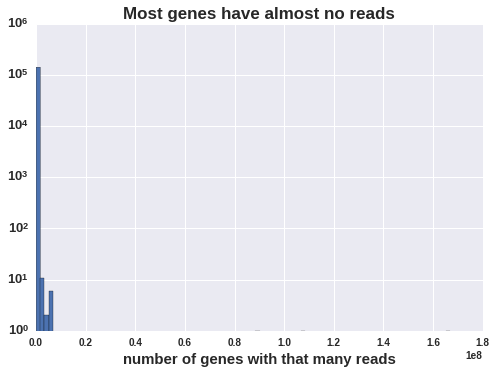

In [20]:
fig, ax = plt.subplots()
gene_sums['gene sum'].hist(ax=ax, bins=100, )
ax.set_yscale('log')
ax.set_xlabel('number of reads mapped')
ax.set_xlabel('number of genes with that many reads')
ax.set_title("Most genes have almost no reads")
if regen_plots:
    fig.savefig(plotpath + 'most_genes_have_no_reads--zoom0.pdf')

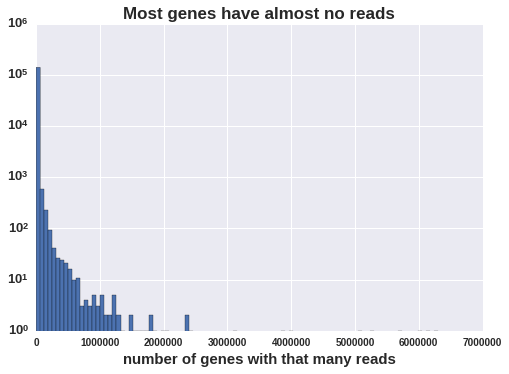

In [21]:
fig, ax = plt.subplots()
#ax.set_xlim(0, 10**5)
gene_sums[gene_sums['gene sum'] < 10**7]['gene sum'].hist(ax=ax, bins=100, )
ax.set_yscale('log')
ax.set_xlabel('number of reads mapped')
ax.set_xlabel('number of genes with that many reads')
ax.set_title("Most genes have almost no reads")
if regen_plots:
    fig.savefig(plotpath + 'most_genes_have_no_reads--zoom1.pdf')

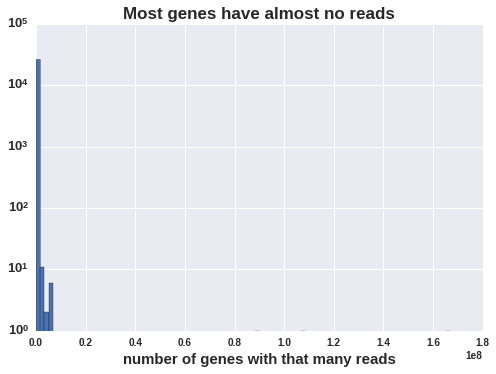

In [22]:
fig, ax = plt.subplots()
#ax.set_xlim(0, 10**5)
gene_sums[gene_sums['gene sum'] > 10**3]['gene sum'].hist(ax=ax, bins=100, )
ax.set_yscale('log')
ax.set_xlabel('number of reads mapped')
ax.set_xlabel('number of genes with that many reads')
ax.set_title("Most genes have almost no reads")
if regen_plots:
    fig.savefig(plotpath + 'most_genes_have_no_reads--zoom_high.pdf')

In [23]:
gene_sums[gene_sums['gene sum'] > 5].head()

gene sum
genome                      locus_tag       product                                          
Methylobacter-123 (UID203)  Ga0081607_10011 DNA gyrase B subunit, carboxyl terminus       455
                            Ga0081607_10012 Putative addiction module component           277
                            Ga0081607_10013 hypothetical protein                          139
                            Ga0081607_10014 hypothetical protein                         1843
                            Ga0081607_10015 Protein of unknown function (DUF2281)          69

In [24]:
gene_sums[gene_sums['gene sum'] > 10**6].head()

gene sum
genome                      locus_tag        product                       
Methylobacter-123 (UID203)  Ga0081607_104311 hypothetical protein   1223919
                            Ga0081607_110425 S-layer protein        2078415
                            Ga0081607_11219  hypothetical protein   1823383
                            Ga0081607_114212 hypothetical protein   1201012
                            Ga0081607_115213 flagellin              1495380

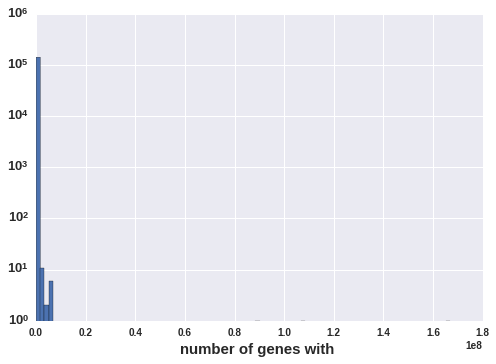

In [25]:
fig, ax = plt.subplots()
gene_sums[gene_sums['gene sum'] > 0]['gene sum'].hist(ax=ax, bins=100, )
ax.set_yscale('log')
ax.set_xlabel('number of genes with ')

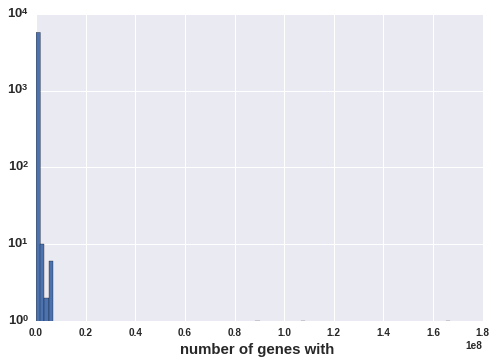

In [26]:
fig, ax = plt.subplots()
gene_sums[gene_sums['gene sum'] > 10**4]['gene sum'].hist(ax=ax, bins=100, )
ax.set_yscale('log')
ax.set_xlabel('number of genes with ')